https://gombru.github.io/2018/05/23/cross_entropy_loss/

http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf

[Horses or Humans Convnet](https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%202%20-%20Notebook.ipynb)


[Horses or Humans with Validation](https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%203%20-%20Notebook.ipynb)

[Horses or Humans with Compacting of Images](https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%204%20-%20Notebook.ipynb)

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-05-12 12:01:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  84.9MB/s    in 1.7s    

2020-05-12 12:01:13 (84.9 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-05-12 12:01:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 2607:f8b0:4001:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [applicat

In [0]:
import os
import zipfile
local_zip_path = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip_path,'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip_path = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip_path,'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])
validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])
validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse13-6.png', 'horse37-7.png', 'horse46-1.png', 'horse38-6.png', 'horse08-9.png', 'horse07-4.png', 'horse11-3.png', 'horse13-0.png', 'horse23-8.png', 'horse10-7.png']
['human03-08.png', 'human11-08.png', 'human10-06.png', 'human13-09.png', 'human06-01.png', 'human07-29.png', 'human15-06.png', 'human07-03.png', 'human16-15.png', 'human08-13.png']
['horse5-083.png', 'horse5-259.png', 'horse1-298.png', 'horse3-326.png', 'horse5-181.png', 'horse4-072.png', 'horse5-550.png', 'horse6-153.png', 'horse5-504.png', 'horse3-484.png']
['valhuman04-00.png', 'valhuman01-01.png', 'valhuman04-14.png', 'valhuman04-07.png', 'valhuman05-17.png', 'valhuman01-04.png', 'valhuman02-01.png', 'valhuman02-02.png', 'valhuman02-12.png', 'valhuman01-15.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

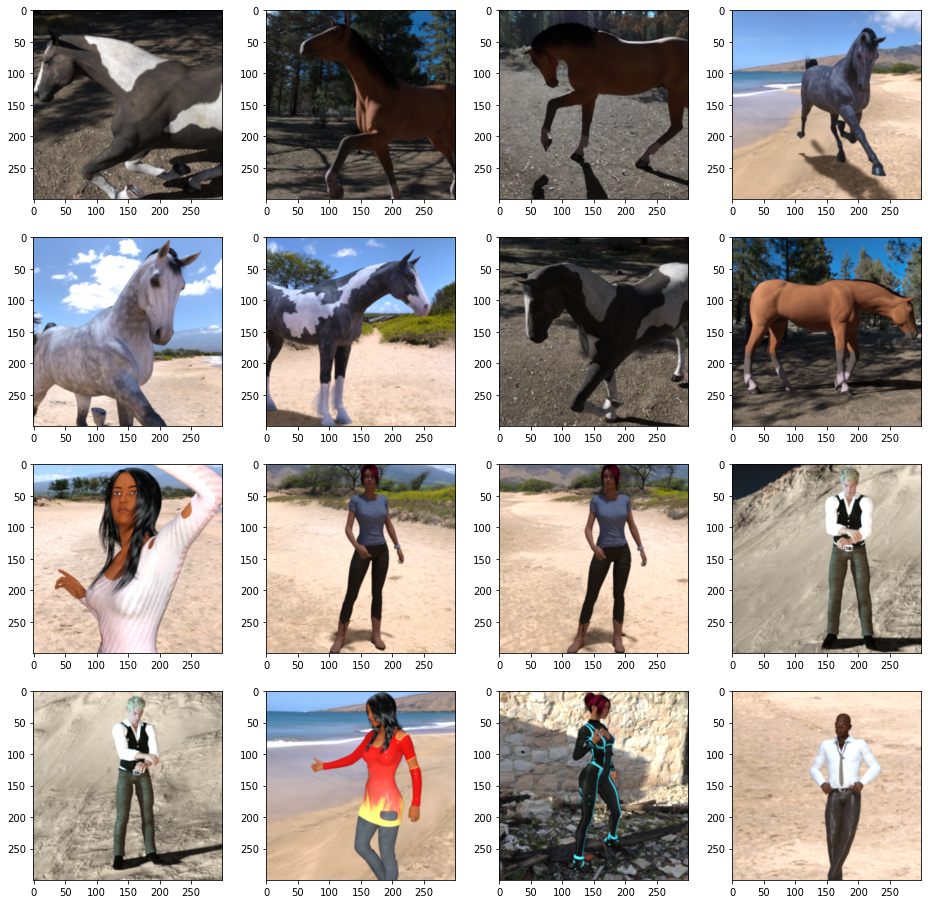

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir,fname)
                  for fname  in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir,fname)
                  for fname  in train_human_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('on')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Building a Small Model from Scratch

In [0]:
import tensorflow as tf

In [27]:
model = tf.keras.models.Sequential([
  #tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (300,300,3)),
  tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
  tf.keras.layers.MaxPooling2D(2,2),#1
  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),#2
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),#3
  #tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),#4
  #tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),#5
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33856)            

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [0]:
from tensorflow.keras.optimizers import  RMSprop
model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(lr = 0.001),#='adam',
    metrics = ['accuracy']
)

### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit`, `evaluate_generator`, and `predict_generator`.

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#All images are rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    #target_size = (300,300),
    target_size = (200,200),
    batch_size = 128,
    class_mode = 'binary'
)
# Flow validation images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    #target_size = (300,300),
    target_size = (200,200),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


#Training

In [33]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/15
8/8 [==============================] - 7s 822ms/step - loss: 2.5318 - accuracy: 0.5557 - val_loss: 0.5587 - val_accuracy: 0.7305
Epoch 2/15
8/8 [==============================] - 8s 939ms/step - loss: 0.7502 - accuracy: 0.6974 - val_loss: 0.8401 - val_accuracy: 0.5938
Epoch 3/15
8/8 [==============================] - 7s 848ms/step - loss: 0.3486 - accuracy: 0.8420 - val_loss: 1.4771 - val_accuracy: 0.7070
Epoch 4/15
8/8 [==============================] - 7s 833ms/step - loss: 0.2304 - accuracy: 0.8954 - val_loss: 0.9488 - val_accuracy: 0.7852
Epoch 5/15
8/8 [==============================] - 7s 825ms/step - loss: 0.1164 - accuracy: 0.9577 - val_loss: 1.1537 - val_accuracy: 0.8477
Epoch 6/15
8/8 [==============================] - 7s 832ms/step - loss: 0.5868 - accuracy: 0.8476 - val_loss: 1.4994 - val_accuracy: 0.7461
Epoch 7/15
8/8 [==============================] - 7s 852ms/step - loss: 0.0771 - accuracy: 0.9733 - val_loss: 2.0950 - val_accuracy: 0.7656
Epoch 8/15
8/8 [====

#Running the Model
[visit pixabay for images](https://pixabay.com)

In [34]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  #img = image.load_img(path, target_size=(300, 300))
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving WhatsApp Image 2020-03-19 at 6.03.53 PM.jpeg to WhatsApp Image 2020-03-19 at 6.03.53 PM.jpeg
[0.]
WhatsApp Image 2020-03-19 at 6.03.53 PM.jpeg is a horse


### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


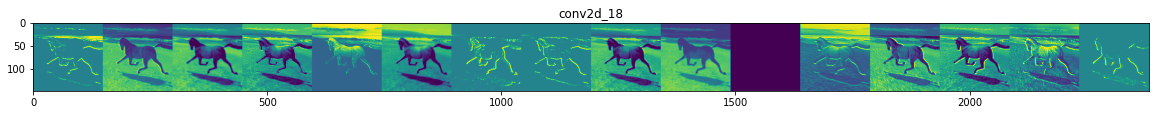

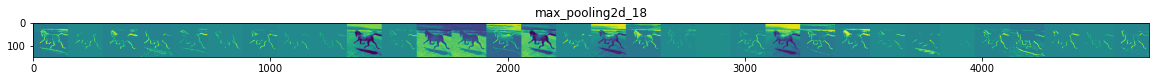

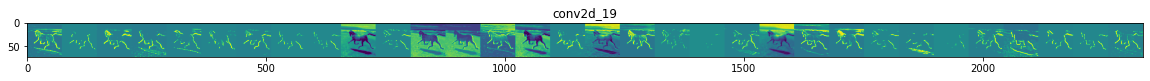

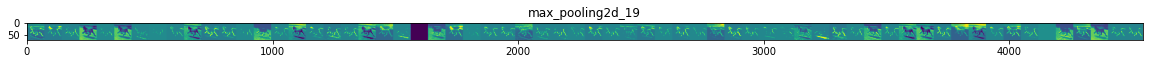

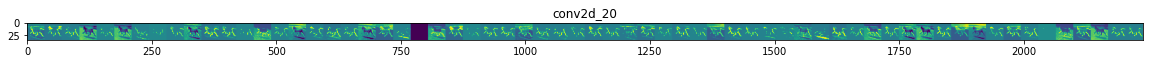

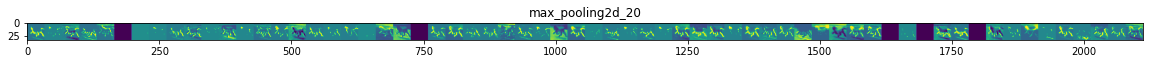

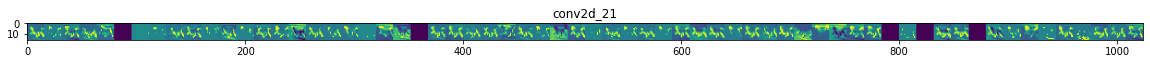

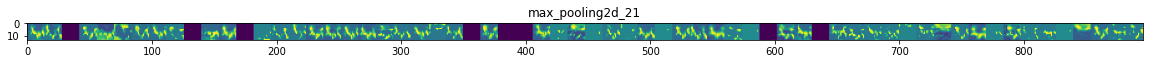

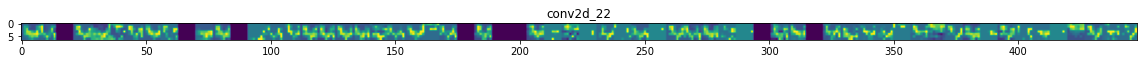

In [68]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

#Clean Up

In [0]:
#import os, signal
#os.kill(os.getpid(), signal.SIGKILL)

# **Exercise 4-Question**
Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. Create a convolutional neural network that trains to 100% accuracy on these images, which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.


In [0]:
import tensorflow as tf

In [0]:
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
         # Your Code
         def on_epoch_end(self, epoch, logs={}):
          if(logs.get('acc')>DESIRED_ACCURACY):
            print("\nAccuracy 99.9% ==> Cancelling Training!!")
            self.model.stop_training = True

    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([
        # Your Code Here
        tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation= 'relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model.summary()

    from tensorflow.keras.optimizers import RMSprop

    model.compile(
        loss = 'binary_crossentropyry',
        optimizer = RMSprop(lr = 0.001),
        metrics = ['acc']
    )
        

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale = 1/255)# Your Code Here

    # Please use a target_size of 150 X 150.
    train_generator = train_datagen.flow_from_directory(
      # Your Code Here
      '/tmp2/happy-or-sad/',
      target_size = (150,150),
      batch_size = 128,
      class_mode = 'binary'
    )
    # Expected output: 'Found 80 images belonging to 2 classes'

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
    history = model.fit_generator(
      # Your Code Here
      train_generator,
      steps_per_epoch = 8,
      epochs = 15,
      verbose =1,
      callbacks = [callbacks]
    )
    # model fitting
    return history.history['acc'][-1]

In [0]:
# The Expected output: "Reached 99.9% accuracy so cancelling training!""
train_happy_sad_model()